In [1]:
import pandas as pd
import numpy as np 
from helpers import s3_connection
import helpers 
import matplotlib.pyplot as plt

In [2]:
s3 = s3_connection()

Connection successful


## Ouverture des données

In [3]:
path_logements_existants = "clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-existants.csv"
DPE_logements_existants = s3.read_file_from_s3(path_logements_existants)
DPE_logements_existants

/home/onyxia/work/STATAPP/helpers.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)


,Date_réception_DPE,Date_établissement_DPE,Modèle_DPE,Date_fin_validité_DPE,Version_DPE,Méthode_application_DPE,Etiquette_DPE,Etiquette_GES,Année_construction,Type_bâtiment,...,Code_postal_(brut),N°_étage_appartement,Nom_résidence,Cage_d'escalier,Complément_d'adresse_logement,Statut_géocodage,Nom__commune_(Brut),N°_département_(BAN),N°_région_(BAN),Complément_d'adresse_bâtiment
0,2021-12-23,2021-12-22,DPE 3CL 2021 méthode logement,2031-12-21,2.0,dpe appartement individuel,D,C,1945.0,appartement,...,25000,NaN,NaN,NaN,NaN,adresse géocodée ban à l'adresse,Besançon,25,27.0,NaN
1,2022-01-03,2021-12-01,DPE 3CL 2021 méthode logement,2031-11-30,1.1,dpe appartement individuel,D,D,1948.0,appartement,...,13016,0.0,NaN,NaN,Etage : 6,adresse non géocodée ban car aucune correspond...,MARSEILLE,13,93.0,NaN
2,2023-04-07,2023-04-07,DPE 3CL 2021 méthode logement,2033-04-06,2.2,dpe appartement généré à partir des données DP...,D,B,NaN,appartement,...,32000,0.0,NaN,NaN,Lot : 00045-00004-00002 - Porte : 2 - Etage : ...,adresse non géocodée ban car aucune correspond...,AUCH,32,76.0,c52041673531345
3,2021-12-22,2021-12-02,DPE 3CL 2021 méthode logement,2031-12-01,1.1,dpe issu d'une étude thermique réglementaire R...,C,C,1976.0,appartement,...,44800,NaN,NaN,NaN,NaN,adresse géocodée ban à l'adresse,Saint-Herblain,44,52.0,NaN
4,2022-01-03,2021-10-26,DPE 3CL 2021 méthode logement,2031-10-25,1.1,dpe appartement individuel,D,D,1948.0,appartement,...,92330,0.0,NaN,NaN,Etage : NC,adresse non géocodée ban car aucune correspond...,SCEAUX,92,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537520,2022-10-25,2022-10-25,DPE 3CL 2021 méthode logement,2032-10-24,2.2,dpe appartement généré à partir des données DP...,E,E,1971.0,appartement,...,95230,NaN,NaN,NaN,3-R039L-05/06 ( 2/4 all des bouleaux)-82-R039L...,adresse géocodée ban à l'adresse,SOISY-SOUS-MONTMORENCY,95,11.0,NaN
4537521,2022-07-21,2022-07-21,DPE 3CL 2021 méthode logement,2032-07-20,2.1,dpe appartement généré à partir des données DP...,D,B,1948.0,appartement,...,30110,NaN,NaN,NaN,1-Bâtiment n°1-19-5010380379 PORTE 79,adresse géocodée ban à l'adresse,La Grand-Combe,30,76.0,NaN
4537522,2022-06-02,2022-06-02,DPE 3CL 2021 méthode logement,2032-06-01,2.1,dpe maison individuelle,D,D,1980.0,maison,...,41290,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,OUCQUES,41,24.0,NaN
4537523,2022-10-27,2022-10-26,DPE 3CL 2021 méthode logement,2032-10-25,2.2,dpe appartement individuel,G,D,1945.0,appartement,...,44000,NaN,NaN,NaN,1-Bâtiment n°1-1-LogZone,adresse non géocodée ban car aucune correspond...,NANTES,44,52.0,NaN


In [4]:
path_logements_neufs = "clichere/diffusion/DPE/DPE_ADEME/dpe-v2-logements-neufs.csv"
DPE_logements_neufs = s3.read_file_from_s3(path_logements_neufs)
DPE_logements_neufs

/home/onyxia/work/STATAPP/helpers.py:31: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)


,Date_réception_DPE,Date_établissement_DPE,Date_fin_validité_DPE,Version_DPE,Modèle_DPE,Etiquette_DPE,Etiquette_GES,Type_bâtiment,Surface_habitable_logement,Adresse_brute,...,Code_postal_(brut),N°_étage_appartement,Nom_résidence,Complément_d'adresse_bâtiment,Cage_d'escalier,Complément_d'adresse_logement,Statut_géocodage,Nom__commune_(Brut),N°_département_(BAN),N°_région_(BAN)
0,2021-09-30,2021-09-29,2031-09-28,1.0,DPE NEUF logement : RT2012,C,C,maison,43.2,42 rue de Venteille,...,33185,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,LE HAILLAN,33,75.0
1,2022-02-04,2022-02-02,2032-02-01,2.0,DPE NEUF logement : RT2012,B,A,appartement,44.2,Les Hauts de Kerdanné,...,29490,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,GUIPAVAS,29,53.0
2,2023-04-05,2023-04-05,2033-04-04,2.2,DPE NEUF logement : RT2012,A,A,maison,105.7,Fontfary,...,7340,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,VINZIEUX,07,84.0
3,2021-09-01,2021-09-01,2031-08-31,1.0,DPE NEUF logement : RT2012,C,C,maison,71.6,RD 12,...,31470,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,SAINT-LYS,91,11.0
4,2022-07-25,2022-07-25,2032-07-24,2.1,DPE NEUF logement : RT2012,A,A,maison,128.8,"39, avenue Marius Mathon",...,69220,NaN,NaN,NaN,NaN,NaN,adresse non géocodée ban car aucune correspond...,BELLEVILLE,69,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537947,2022-05-16,2022-05-16,2032-05-15,2.1,DPE NEUF logement : RT2012,B,A,maison,94.2,av chabadenia,...,64210,0.0,NaN,NaN,NaN,NaN,adresse géocodée ban à l'adresse,Bidart,64,75.0
537948,2022-11-16,2022-11-16,2032-11-15,2.2,DPE NEUF logement : RT2012,B,B,appartement,65.9,Lieu dit '' TRABACCHINA '',...,20090,NaN,NaN,NaN,NaN,1-BAT_A-13-A13,adresse non géocodée ban car aucune correspond...,AJACCIO,2A,94.0
537949,2022-12-12,2022-12-12,2032-12-11,2.2,DPE NEUF logement : RT2012,C,C,appartement,77.7,Batiment 2\n167-187 RUE EDOUARD VAILLANT,...,93140,0.0,NaN,19893-2022-BDH091142-BAT-3-4,NaN,T4 Niveau R+2 Lgmt N° 422,adresse géocodée ban à l'adresse,BONDY,93,11.0
537950,2022-07-01,2022-07-01,2032-06-30,2.1,DPE NEUF logement : RT2012,C,C,appartement,66.4,155-157 Route de Fleury,...,91170,NaN,NaN,1-Batiment Collectif-1-Zone chauffée,NaN,15-A25 - 2022-06-DPE185,adresse non géocodée ban car aucune correspond...,VIRY-CHATILLON,91,11.0


In [5]:
path_valeursfoncieres_2022 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2022.txt"
vf2022 = s3.read_file_from_s3(path_valeursfoncieres_2022, sep="|")

path_valeursfoncieres_2021 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2021.txt"
vf2021 = s3.read_file_from_s3(path_valeursfoncieres_2021, sep="|")

path_valeursfoncieres_2020 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2020.txt"
vf2020 = s3.read_file_from_s3(path_valeursfoncieres_2020, sep="|")

path_valeursfoncieres_2019 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2019.txt"
vf2019 = s3.read_file_from_s3(path_valeursfoncieres_2019, sep="|")

path_valeursfoncieres_2018 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2018.txt"
vf2018 = s3.read_file_from_s3(path_valeursfoncieres_2018, sep="|")

path_valeursfoncieres_2017 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2017.txt"
vf2017 = s3.read_file_from_s3(path_valeursfoncieres_2017, sep="|")

path_valeursfoncieres_2016 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2016.txt"
vf2016 = s3.read_file_from_s3(path_valeursfoncieres_2016, sep="|")

path_valeursfoncieres_2015 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2015.txt"
vf2015 = s3.read_file_from_s3(path_valeursfoncieres_2015, sep="|")

path_valeursfoncieres_2014 = "clichere/diffusion/Valeursfoncières/valeursfoncieres-2014.txt"
vf2014 = s3.read_file_from_s3(path_valeursfoncieres_2014, sep="|")


/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)


/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (14,18,23,24,26,28,29,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)
/home/onyxia/work/STATAPP/helpers.py:31: DtypeWarning: Columns (14,18,23,24,26,28,29,30,31,32,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_in, usecols=columns_to_select, dtype=dtype_spec, sep=sep)

In [6]:
vf = pd.concat([vf2022, vf2021, vf2020, vf2019, vf2018, vf2017, vf2016, vf2015, vf2014], ignore_index=True)

## **Première analyse des données**

#### **Evaluation des données manquantes dans les bases DPE**

In [7]:
print("Nombre de lignes par colonnes:", len(DPE_logements_existants))
total_nan = DPE_logements_existants.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = DPE_logements_existants.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 4537525
Nombre total de NaN : 17334637
Les 10 colonnes avec le plus de NaN :
Cage_d'escalier                  4473586
Nom_résidence                    4187600
Complément_d'adresse_bâtiment    2567157
Complément_d'adresse_logement    2195128
Année_construction               1484043
N°_étage_appartement             1145452
N°_voie_(BAN)                     630304
Nom__rue_(BAN)                    347796
Surface_habitable_logement         52267
Adresse_(BAN)                      29373
dtype: int64


In [8]:
print("Nombre de lignes par colonnes:", len(DPE_logements_neufs))
total_nan = DPE_logements_neufs.isna().sum().sum()
print(f"Nombre total de NaN : {total_nan}")
nan_par_colonne = DPE_logements_neufs.isna().sum()
top_10_nan_colonnes = nan_par_colonne.sort_values(ascending=False).head(10)
print("Les 10 colonnes avec le plus de NaN :")
print(top_10_nan_colonnes)

Nombre de lignes par colonnes: 537952
Nombre total de NaN : 2590459
Les 10 colonnes avec le plus de NaN :
Cage_d'escalier                  533124
Nom_résidence                    500611
Complément_d'adresse_bâtiment    451278
N°_étage_appartement             395375
Complément_d'adresse_logement    298515
N°_voie_(BAN)                    283875
Nom__rue_(BAN)                    84559
N°_département_(BAN)               4253
N°_région_(BAN)                    4253
Surface_habitable_logement         4053
dtype: int64


### **Statistiques descriptives de la base DPE logements existants**
##### **Répartition des étiquettes DPE pour les logements existants**

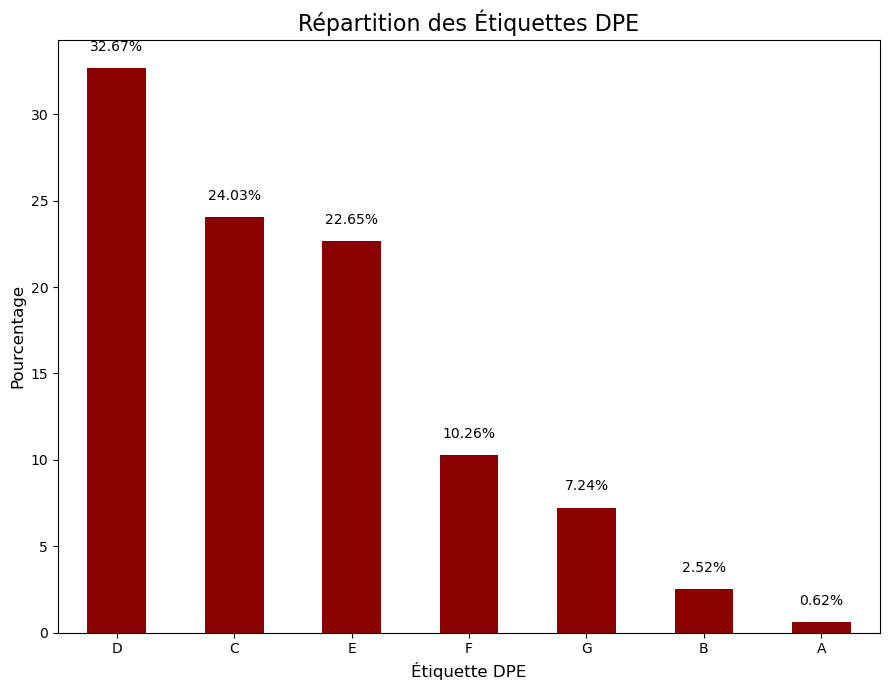

In [9]:
resultat_dpe = DPE_logements_existants["Etiquette_DPE"].value_counts(normalize=True) * 100

# Histogramme
plt.figure(figsize=(9, 7))
resultat_dpe.plot(kind='bar', color='darkred')
plt.title("Répartition des Étiquettes DPE", fontsize=16)
plt.xlabel("Étiquette DPE", fontsize=12)
plt.ylabel("Pourcentage", fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(resultat_dpe):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=10)
plt.tight_layout()
plt.show()


##### **Répartition des étiquettes DPE dans chaque département :**
Nous avons fait le choix de filtrer les données pour les codes départements allant de 01 à 101 et d'éliminer les quelques logements dont les informations étaient erronées.

In [ ]:
DPE_logements_existants["N°_département_(BAN)"] = pd.to_numeric(DPE_logements_existants["N°_département_(BAN)"], errors="coerce")
DPE_filtre101 = DPE_logements_existants[DPE_logements_existants["N°_département_(BAN)"] <= 101]
DPE_filtre101["N°_département_(BAN)"] = DPE_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)
resultat = DPE_filtre101.groupby("N°_département_(BAN)")["Etiquette_DPE"].value_counts(normalize=True).unstack() * 100
pd.options.display.float_format = "{:.2f}%".format
print(resultat)


/tmp/ipykernel_82843/867284804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPE_filtre101["N°_département_(BAN)"] = DPE_filtre101["N°_département_(BAN)"].astype(int).astype(str).str.zfill(2)


Etiquette_DPE            A     B      C      D      E      F      G
N°_département_(BAN)                                               
01                   0.80% 2.61% 23.87% 33.95% 21.78%  9.96%  7.04%
02                   0.11% 0.87% 11.60% 29.81% 31.61% 14.92% 11.07%
03                   0.54% 3.17% 16.22% 28.77% 23.89% 14.60% 12.80%
04                   0.13% 1.22%  9.37% 23.38% 31.13% 17.28% 17.49%
05                   0.10% 0.73%  5.56% 20.51% 39.29% 17.68% 16.13%
...                    ...   ...    ...    ...    ...    ...    ...
91                   0.17% 1.57% 28.65% 34.57% 20.75%  8.59%  5.71%
92                   0.13% 1.35% 19.37% 29.42% 25.82% 12.34% 11.57%
93                   0.04% 1.38% 25.07% 32.43% 23.12%  9.73%  8.23%
94                   0.10% 2.44% 23.67% 29.82% 25.13% 11.25%  7.58%
95                   0.13% 1.58% 25.29% 33.26% 23.06% 10.27%  6.41%

[94 rows x 7 columns]


In [13]:
# Trouver le département avec le plus de logements en A et G
logements_A = DPE_filtre101[DPE_filtre101["Etiquette_DPE"] == "A"]
logements_G = DPE_filtre101[DPE_filtre101["Etiquette_DPE"] == "G"]
logements_A_count = logements_A["N°_département_(BAN)"].value_counts()
logements_G_count = logements_G["N°_département_(BAN)"].value_counts()
departement_max_A = logements_A_count.idxmax()
departement_max_G = logements_G_count.idxmax()
print(f"Le département avec le plus de logements en A : {departement_max_A} ({logements_A_count.max()} logements)")
print(f"Le département avec le plus de logements en G : {departement_max_G} ({logements_G_count.max()} logements)")

Le département avec le plus de logements en A : 13 (2148 logements)
Le département avec le plus de logements en G : 75 (38521 logements)


/tmp/ipykernel_82843/1072597135.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_82843/1072597135.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
/tmp/ipykernel_82843/1072597135.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt

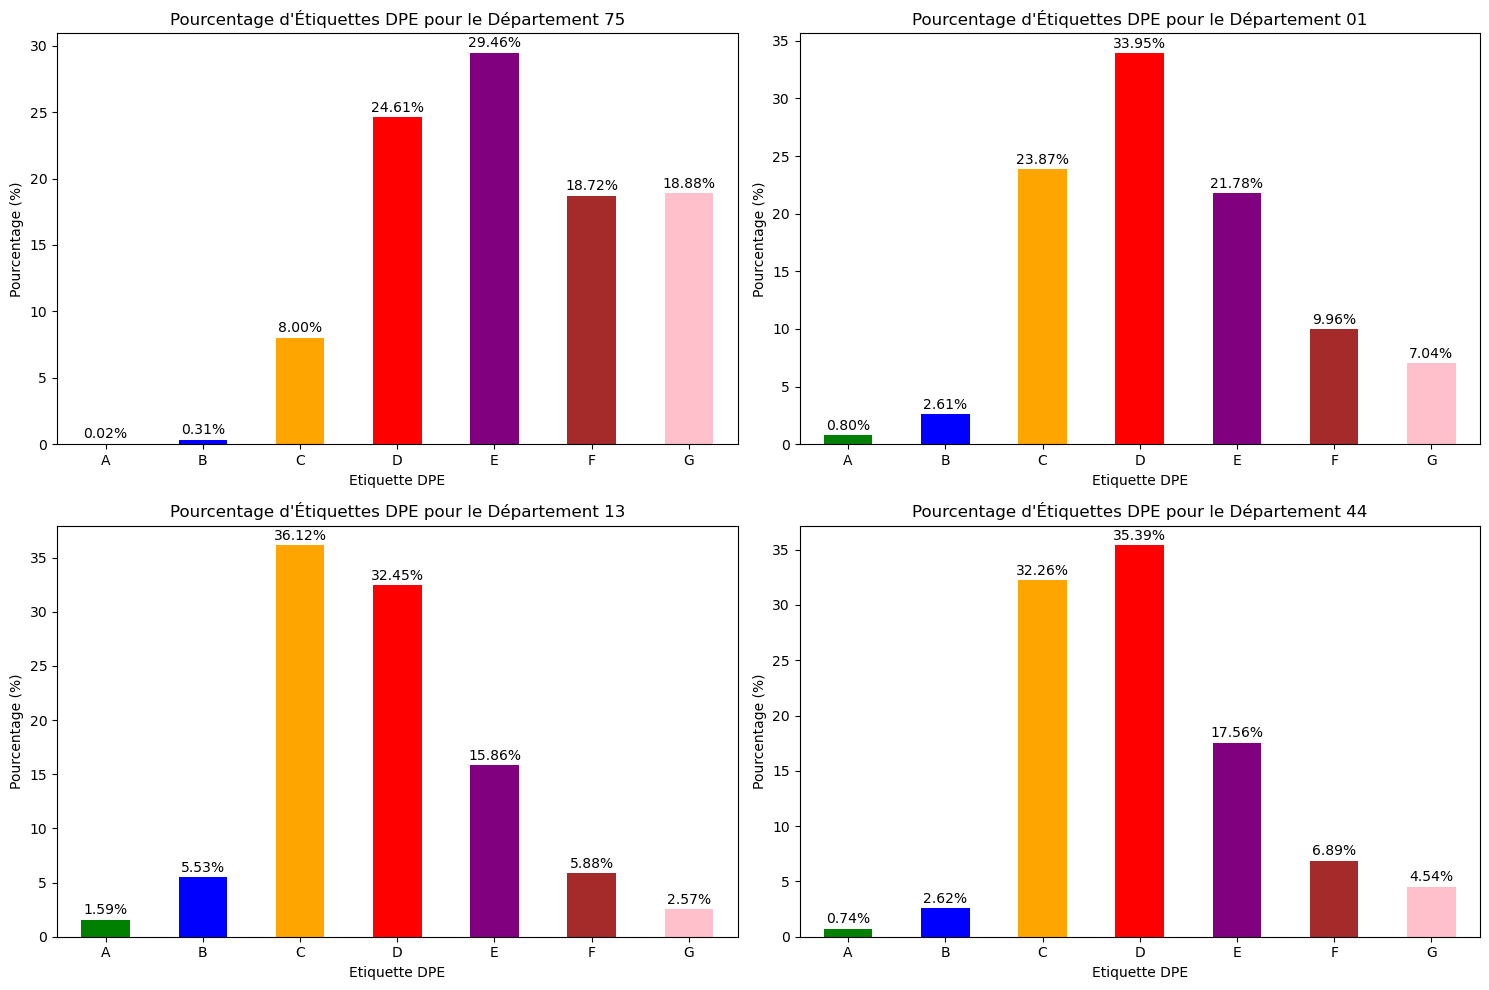

In [17]:
departements = ["75", "01", "13", "44"]

# Histogramme pour chaque département
plt.figure(figsize=(15, 10))

for i, dep in enumerate(departements, 1):
    plt.subplot(2, 2, i)  
    resultat_dep = resultat.loc[dep]  
    
    # Histogramme pour chaque département
    resultat_dep.plot(kind='bar', color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    plt.title(f"Pourcentage d'Étiquettes DPE pour le Département {dep}", fontsize=12)
    plt.xlabel("Etiquette DPE", fontsize=10)
    plt.ylabel("Pourcentage (%)", fontsize=10)
    for j in range(len(resultat_dep)):
        plt.text(j, resultat_dep[j] + 0.20, f"{resultat_dep[j]:.2f}%", ha='center', va='bottom')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

L’analyse des graphiques montre des disparités marquées entre les départements en matière de performance énergétique des logements. Le département 75 (Paris) se distingue par la plus forte proportion de logements classés G, soulignant un parc immobilier ancien et énergivore. À l’inverse, le département 13 (Bouches-du-Rhône) est celui qui compte le plus de logements en A, indiquant une meilleure efficacité énergétique pour une partie du parc. Dans l’ensemble, les étiquettes C, D et E sont les plus répandues dans tous les départements, ce qui reflète une performance moyenne. Le 01 (Ain) et le 44 (Loire-Atlantique) présentent des distributions plus équilibrées, avec une dominance des classes C et D. Ces résultats mettent en évidence des écarts significatifs entre les territoires, qui peuvent être liés à l’âge des bâtiments, aux politiques locales de rénovation et aux différences climatiques.

##### **Répartition des étiquettes DPE par type de bâtiment :**

Étude de la répartition des types de bâtiments parmi tous les logements et comparaison des étiquettes DPE par type de bâtiment. 

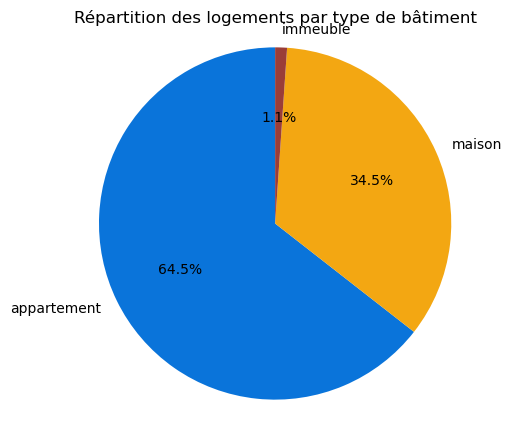

Pourcentages d'étiquettes DPE par type de bâtiment:
Etiquette_DPE     A     B      C      D      E      F     G
Type_bâtiment                                              
appartement   0.26% 2.09% 26.63% 33.87% 22.05%  8.98% 6.12%
immeuble      0.22% 2.19% 36.05% 33.84% 17.97%  6.39% 3.34%
maison        1.23% 3.23% 18.33% 30.51% 24.19% 12.94% 9.57%

Le type de bâtiment avec le plus de logements en A : maison (19165 logements)
Le type de bâtiment avec le plus de logements en E : appartement (636663 logements)


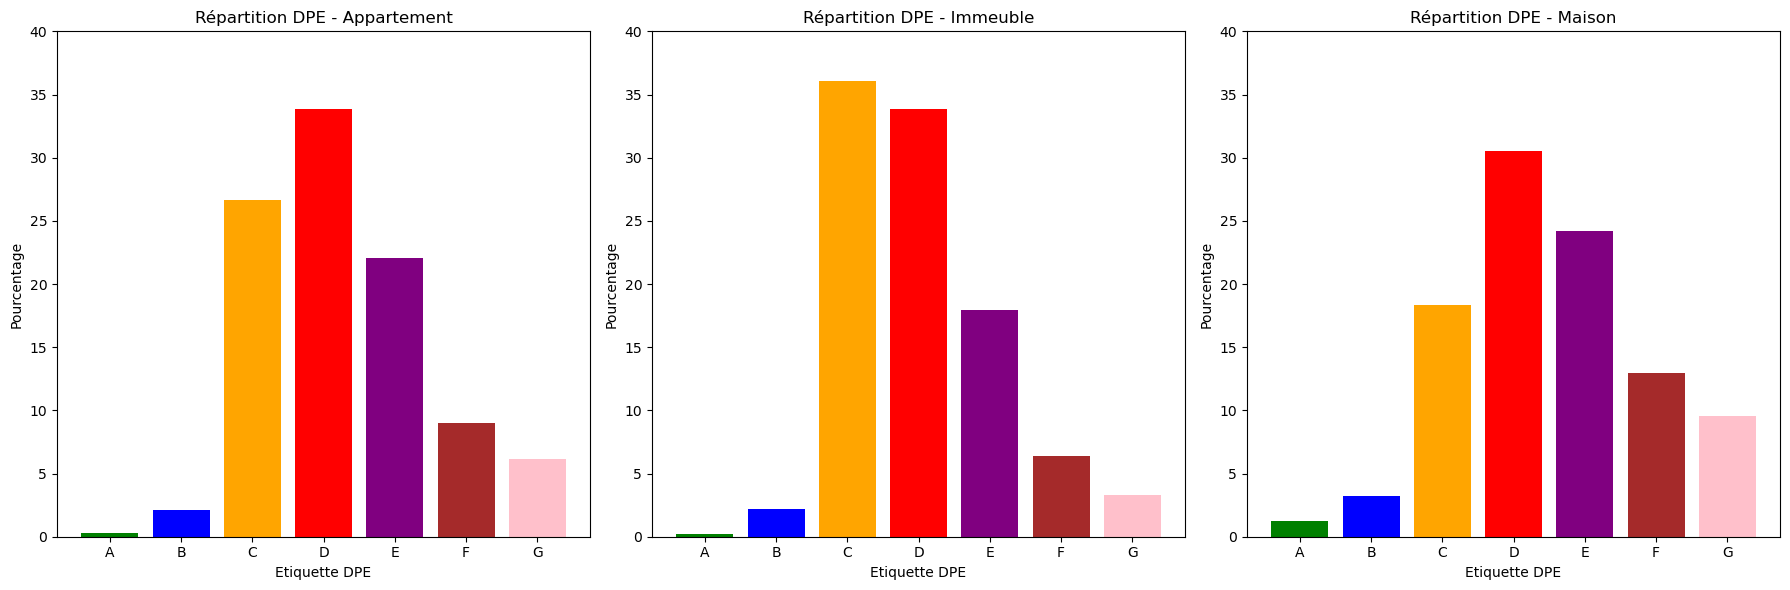

In [19]:
repartition_batiment = DPE_logements_existants['Type_bâtiment'].value_counts()

# Camembert
plt.figure(figsize=(5, 5))
plt.pie(repartition_batiment, labels=repartition_batiment.index, autopct='%1.1f%%', startangle=90, colors=['#0A74DA', '#F3A712', '#9A3D38'])
plt.title("Répartition des logements par type de bâtiment")
plt.axis('equal') 
plt.show()

# Filtrer les données par 'Type_batiment' et 'Etiquette_DPE'
resultat_batiment = DPE_filtre101.groupby(['Type_bâtiment', 'Etiquette_DPE']).size().unstack(fill_value=0)
resultat_batiment_percentage = (resultat_batiment.T / resultat_batiment.sum(axis=1)).T * 100
print("Pourcentages d'étiquettes DPE par type de bâtiment:")
print(resultat_batiment_percentage)

# Bâtiment avec le plus de logements en A et en E
logements_A_batiment = DPE_filtre101[DPE_filtre101["Etiquette_DPE"] == "A"]
logements_A_batiment_count = logements_A_batiment.groupby("Type_bâtiment").size()
logements_E_batiment = DPE_filtre101[DPE_filtre101["Etiquette_DPE"] == "E"]
logements_E_batiment_count = logements_E_batiment.groupby("Type_bâtiment").size()
type_batiment_max_A = logements_A_batiment_count.idxmax()
type_batiment_max_E = logements_E_batiment_count.idxmax()
print(f"\nLe type de bâtiment avec le plus de logements en A : {type_batiment_max_A} ({logements_A_batiment_count.max()} logements)")
print(f"Le type de bâtiment avec le plus de logements en E : {type_batiment_max_E} ({logements_E_batiment_count.max()} logements)")

# Histogrammes pour chaque type de bâtiment
types_batiment = ['appartement', 'immeuble', 'maison']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for i, batiment in enumerate(types_batiment):
    data = resultat_batiment_percentage.loc[batiment]
    axes[i].bar(data.index, data.values, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'pink'])
    axes[i].set_title(f"Répartition DPE - {batiment.capitalize()}")
    axes[i].set_xlabel("Etiquette DPE")
    axes[i].set_ylabel("Pourcentage")
    axes[i].set_ylim(0, 40)  
    axes[i].tick_params(axis='x', rotation=0)  
plt.tight_layout()
plt.show()
